In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/CosmoDC2/cosmoDC2_photoz_flexzboost/m13.0_5/"

In [13]:
cdc = Table.read(inpath + "Catalog.fits")
cdc_mb = Table.read(inpath + "Catalog_members.fits")

In [16]:
cdc

id,ra,dec,z,mass,NGALS_i,log_mass,m200c,log_m200c
int64,float64,float64,float64,float64,int64,float64,float64,float64
1600020475,50.775875822529436,-27.112584328955446,0.04530489444732666,2.247e+13,7,13.351613892324458,18901145086557.746,13.276488115798056
2700020475,49.466814189348334,-25.960541211222015,0.04615640640258789,1.633e+13,7,13.2130360195722,15062094204754.93,13.177885359536557
17200020453,50.16585579512233,-25.259404686564693,0.08653247356414795,2.283e+13,4,13.358450109677962,20441971397588.734,13.310522776287003
19000020453,49.51865674267036,-26.131426039026245,0.09413313865661621,1.199e+13,7,13.078863522811979,10668658238016.902,13.028109803073287
32800020453,51.49405530538187,-26.309071814426567,0.08795535564422607,1.328e+13,2,13.123179943904667,10371945197971.832,13.015860213430779
32300020442,51.48013416475692,-25.825311694587846,0.10751473903656006,1.339e+13,5,13.126824099732831,11587427913554.93,13.063987045375406
33400020442,50.63847703474752,-25.19421509701307,0.1154489517211914,1.724e+13,5,13.236473113391366,15481136188574.648,13.189802831173791
52100020442,51.30452190097757,-26.069741290019206,0.10782098770141602,2.272e+13,13,13.35641549376063,21053617593329.58,13.323326730377568
11500020432,50.75814114328289,-25.2930466337539,0.15015721321105957,1.176e+13,3,13.070294895422688,10135095509453.521,13.005827845681537


In [6]:
min(cdc['log_mass']), max(cdc['log_mass'])

(13.00011064929296, 13.499998150223101)

In [24]:
bins = np.linspace(0,25,26)

(array([2.1543e+04, 2.9788e+04, 3.6270e+04, 4.2570e+04, 4.4744e+04,
        4.2292e+04, 3.5866e+04, 2.8221e+04, 2.1262e+04, 1.5310e+04,
        1.0614e+04, 7.2090e+03, 4.7020e+03, 3.0140e+03, 1.8070e+03,
        1.1670e+03, 6.5500e+02, 4.1100e+02, 2.3600e+02, 1.2400e+02,
        5.8000e+01, 3.3000e+01, 1.0000e+01, 7.0000e+00, 8.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 <BarContainer object of 25 artists>)

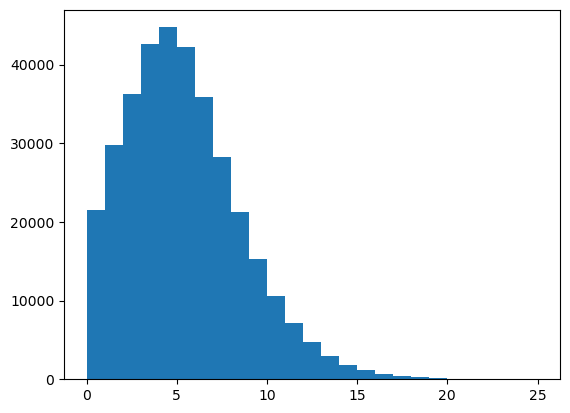

In [25]:
plt.hist(cdc['NGALS_i'], bins = bins)

In [39]:
x_bins = np.linspace(13,13.5, 21)
y_bins = np.linspace(0,20,21)
cdc_hist = np.histogram2d(cdc['log_m200c'], np.log(cdc['NGALS_i']), bins = (x_bins,np.log(y_bins)))
cdc_hist = cdc_hist[0]
cdc_hist[cdc_hist==0] = np.nan
x, y = np.meshgrid(x_bins, y_bins)

/tmp/ipykernel_6498/2525395506.py:3: RuntimeWarning: divide by zero encountered in log
  cdc_hist = np.histogram2d(cdc['log_m200c'], np.log(cdc['NGALS_i']), bins = (x_bins,np.log(y_bins)))


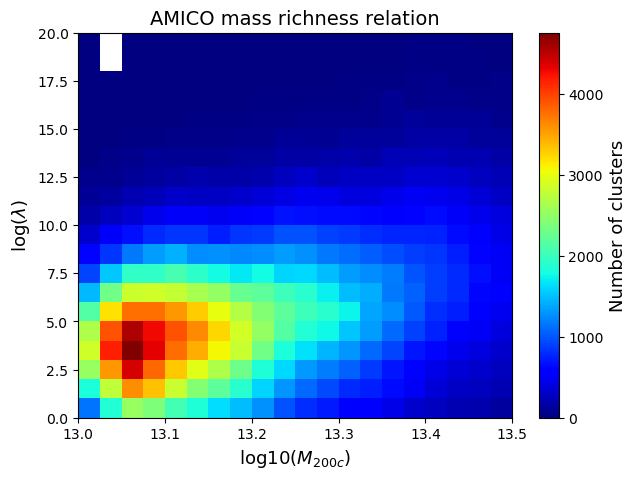

In [40]:
fig, (ax1) = plt.subplots(1,1, figsize = (7,5))
#print(x)
#print(y)
c = ax1.pcolormesh(x, y, cdc_hist.T, cmap='jet', vmin=0)
ax1.set_xlabel('log10($M_{200c}$)', fontsize = 13)
ax1.set_ylabel('log($\lambda$)', fontsize = 13)
ax1.set_title('AMICO mass richness relation', fontsize = 14)
#c1 = ax2.pcolormesh(x, y, rm_hist.T, cmap='jet', vmin=0, vmax = 4000)
#ax2.set_xlabel('mag$_i$')
#ax2.set_ylabel('mag$_r$ - mag$_i$')
#ax2.set_title('RedMapper ' + str(z_min) + '<z<' + str(z_max))
#ax1.set_xlim([16,26])
#ax1.set_ylim([-.5,2])
#ax2.set_xlim([16,26])
#ax2.set_ylim([-.5,2])
cbar = fig.colorbar(c, ax=ax1)
cbar.set_label(label = 'Number of clusters', size = 13)
#cbar.ax.tick_params(labelsize=15)
#fig.colorbar(c1, ax=ax2, label = 'Nb of members')
#plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/massrichness.png', format='png', transparent=True)


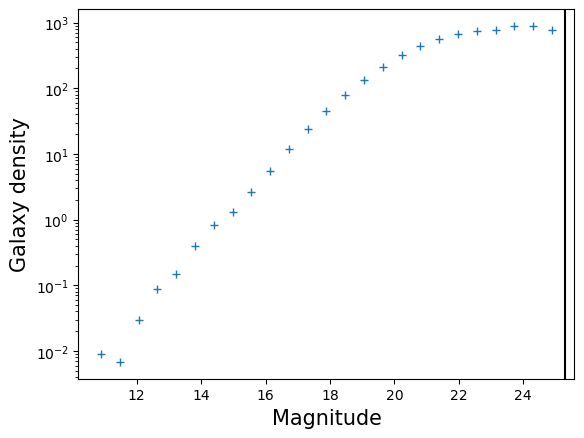

In [52]:
n_gal, mag_i = np.histogram(cdc_mb['mag_i'], bins = 25)
density = n_gal/439.78986 #From text file found on gcr github
plt.plot(mag_i[0:25], density, marker = '+', linestyle = 'none')
plt.axvline(x=25.3, color = 'black')
plt.yscale('log')
plt.xlabel('Magnitude', fontsize = 15)
plt.ylabel('Galaxy density', fontsize = 15)
plt.savefig('galdens_mag')

In [53]:
from astropy.io import ascii

In [55]:
cosmo_values = ascii.read('/sps/lsst/users/tguillem/DESC/desc_may_2021/desc-data-portal/notebooks/dc2/magstar_files/istar.asc')

In [56]:
cosmo_values

col1,col2
float64,float64
0.02,5.2331
0.03,13.6808
0.04,14.2076
0.05,14.7344
0.06,15.2612
0.07,15.6417
0.08,15.9127
0.09,16.1837
0.1,16.4546


In [58]:
cdc_mb

id,id_cluster,ra,dec,z,pmem,mag_g,mag_r,mag_i,mag_z,mag_y
int64,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32
1250000075,1600020475,50.775875822529436,-27.112584328955446,0.04530489444732666,1.0,14.869303,14.04137,13.667305,13.402172,13.204416
1250000078,1600020475,50.77998995907118,-27.107323598441102,0.04530489444732666,1.0,15.914692,15.077406,14.644449,14.309507,14.119247
1250000079,1600020475,50.95558315405602,-27.100375281860327,0.04530489444732666,1.0,18.039742,17.265564,16.901432,16.65677,16.48743
1250000080,1600020475,50.82368075669441,-27.152891726801627,0.04530489444732666,1.0,17.376867,16.799938,16.517538,16.34986,16.230026
1250000081,1600020475,50.90345948560671,-27.10331267498605,0.04530489444732666,1.0,16.36197,15.952614,15.7148075,15.551985,15.428093
1250000084,1600020475,50.73752031959006,-27.137772423229062,0.04530489444732666,1.0,16.757736,15.944899,15.564093,15.298132,15.104336
1250000086,1600020475,50.70632699671811,-27.150415495632586,0.04530489444732666,1.0,17.942202,17.174496,16.81572,16.574202,16.410166
1250000099,2700020475,49.466814189348334,-25.960541211222015,0.04615640640258789,1.0,15.445793,14.616352,14.242224,13.977728,13.779514
1250000101,2700020475,49.36152268516141,-25.983754210597972,0.04615640640258789,1.0,16.939217,16.417784,16.146242,15.978891,15.884966


In [62]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['col1']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(cdc_mb['z'], cdc_mb['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]])
density = n_gal/439.78986

In [65]:
cosmo_values_c = cosmo_values[cosmo_values['col1']<2]

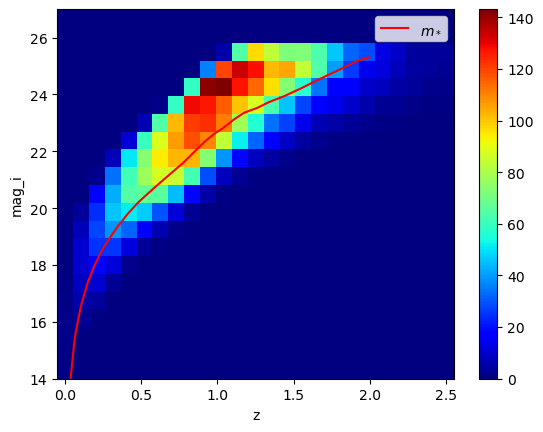

In [67]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values_c['col1'], cosmo_values_c['col2'], color = 'r', label = '$m_*$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

In [68]:
cdc_mb

id,id_cluster,ra,dec,z,pmem,mag_g,mag_r,mag_i,mag_z,mag_y
int64,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32
1250000075,1600020475,50.775875822529436,-27.112584328955446,0.04530489444732666,1.0,14.869303,14.04137,13.667305,13.402172,13.204416
1250000078,1600020475,50.77998995907118,-27.107323598441102,0.04530489444732666,1.0,15.914692,15.077406,14.644449,14.309507,14.119247
1250000079,1600020475,50.95558315405602,-27.100375281860327,0.04530489444732666,1.0,18.039742,17.265564,16.901432,16.65677,16.48743
1250000080,1600020475,50.82368075669441,-27.152891726801627,0.04530489444732666,1.0,17.376867,16.799938,16.517538,16.34986,16.230026
1250000081,1600020475,50.90345948560671,-27.10331267498605,0.04530489444732666,1.0,16.36197,15.952614,15.7148075,15.551985,15.428093
1250000084,1600020475,50.73752031959006,-27.137772423229062,0.04530489444732666,1.0,16.757736,15.944899,15.564093,15.298132,15.104336
1250000086,1600020475,50.70632699671811,-27.150415495632586,0.04530489444732666,1.0,17.942202,17.174496,16.81572,16.574202,16.410166
1250000099,2700020475,49.466814189348334,-25.960541211222015,0.04615640640258789,1.0,15.445793,14.616352,14.242224,13.977728,13.779514
1250000101,2700020475,49.36152268516141,-25.983754210597972,0.04615640640258789,1.0,16.939217,16.417784,16.146242,15.978891,15.884966
